# Comparing polynomial, radial, and linear kernel SVMs on a simulated dataset

## Generating the data

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_style('whitegrid')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [96]:
X = np.random.uniform(0, 3, size=(1000, 2))
Y = np.array([1 if X[i, 1] > 2 * np.sin(X[i, 0]) else -1 for i in range(X.shape[0])])
data = pd.DataFrame({'X_1': X[:, 0], 'X_2': X[:, 1], 'Y': Y})

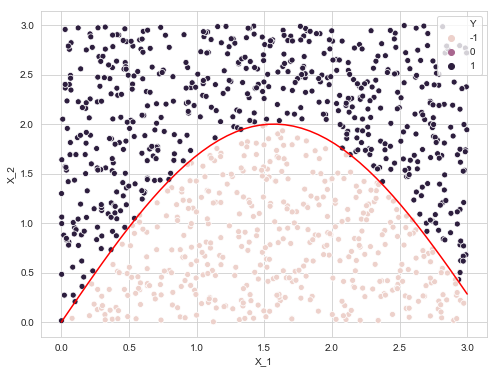

In [126]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['X_1'], y=data['X_2'], data=data, hue='Y')
x = np.linspace(0, 3, 50)
plt.plot(x, 2* np.sin(x), 'r')

## Train test split

In [111]:
from sklearn.model_selection import train_test_split

X, Y = data[['X_1', 'X_2']], data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=100)

## SVMs with linear, polynomial, and radial kernels

Note that what the authors call the support vector classifier is the support vector machine with linear kernel.

### Fit models

In [148]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

svc_poly = SVC(kernel='poly', degree=6)
svc_poly.fit(X_train, y_train)

svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [149]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train['linear_pred'] = svc_linear.predict(X_train)
data_train['poly_pred'] = svc_poly.predict(X_train)
data_train['rbf_pred'] = svc_rbf.predict(X_train)
data_train.head()

,X_1,X_2,Y,linear_pred,poly_pred,rbf_pred
105,0.358341,2.459384,1,1,1,1
446,2.103954,0.025083,-1,-1,-1,-1
232,2.035364,2.543201,1,1,1,1
559,1.507827,0.750842,-1,-1,-1,-1
418,2.756047,2.396298,1,1,1,1


In [150]:
data_test = pd.concat([X_test, y_test], axis=1)
data_test['linear_pred'] = svc_linear.predict(X_test)
data_test['poly_pred'] = svc_poly.predict(X_test)
data_test['rbf_pred'] = svc_rbf.predict(X_test)
data_test.head()

,X_1,X_2,Y,linear_pred,poly_pred,rbf_pred
127,0.490400,0.268376,-1,-1,-1,-1
837,1.329158,1.556672,-1,1,-1,-1
518,0.769138,2.898040,1,1,1,1
743,0.678482,1.677742,1,1,1,1
61,0.375443,1.528661,1,1,1,1


### Compare models on the test data

#### Plot model predictions

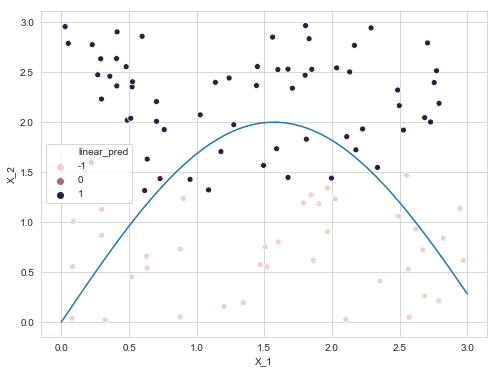

In [151]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X_1', y='X_2', data=data_train, hue='linear_pred')
x = np.linspace(0, 3, 50)
sns.lineplot(x, 2*np.sin(x))

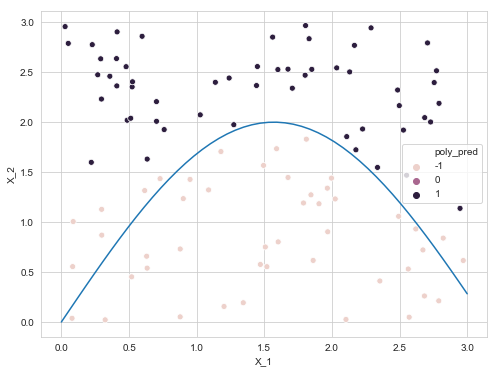

In [152]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X_1', y='X_2', data=data_train, hue='poly_pred')
x = np.linspace(0, 3, 50)
sns.lineplot(x, 2*np.sin(x))

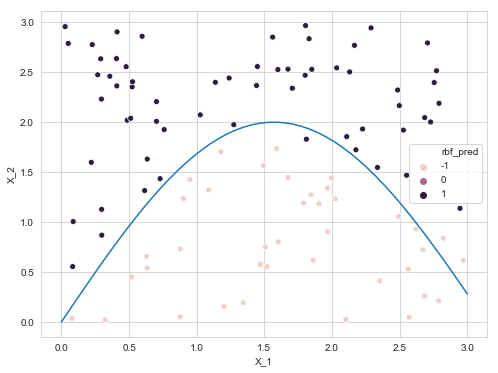

In [153]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='X_1', y='X_2', data=data_train, hue='rbf_pred')
x = np.linspace(0, 3, 50)
sns.lineplot(x, 2*np.sin(x))

#### Train and test errors

In [154]:
from sklearn.metrics import accuracy_score

errors = pd.DataFrame(columns=['train', 'test'], index=['linear', 'poly', 'rbf'])

for model in ['linear', 'poly', 'rbf']:
    errors.at[model, 'train'] = accuracy_score(data_train['Y'], data_train[model+'_pred'])
    errors.at[model, 'test'] = accuracy_score(data_test['Y'], data_test[model+'_pred'])

In [155]:
errors.sort_values('train', ascending=False)

,train,test
rbf,0.97,0.965556
poly,0.92,0.908889
linear,0.84,0.838889


On both training and testing data, the rankings were the same (1) rbf, (2) degree 2 polynomial, (3) linear.